# Example: Loading data from python into IDV

## .to_IDV() method in xarray 


In [2]:
%load_ext ipython_IDV

In [3]:
import numpy as np
import xarray as xr

## Load a random array into IDV

In [4]:
#create a random data and make a xarray dataarray
data=np.random.random((180,360))
data_xr=xr.DataArray(data,dims=['lat','lon'],coords={'lat':range(-90,90),'lon':range(0,360)},name='random') 

In [5]:
data_xr

<xarray.DataArray 'random' (lat: 180, lon: 360)>
array([[0.670093, 0.784377, 0.409137, ..., 0.726175, 0.466415, 0.173591],
       [0.29685 , 0.557347, 0.890125, ..., 0.022452, 0.130703, 0.087429],
       [0.097889, 0.178755, 0.834005, ..., 0.934752, 0.901992, 0.949533],
       ...,
       [0.770955, 0.309456, 0.414089, ..., 0.270197, 0.195103, 0.559949],
       [0.857394, 0.1685  , 0.959192, ..., 0.563705, 0.27302 , 0.550274],
       [0.653033, 0.152847, 0.378471, ..., 0.593272, 0.78419 , 0.521551]])
Coordinates:
  * lat      (lat) int64 -90 -89 -88 -87 -86 -85 -84 -83 -82 -81 -80 -79 -78 ...
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [6]:
data_xr.to_IDV() # this data now is located in your datasources of IDV

data loaded


## Now go to IDV Dashboard, Field Selector tab, and make a display

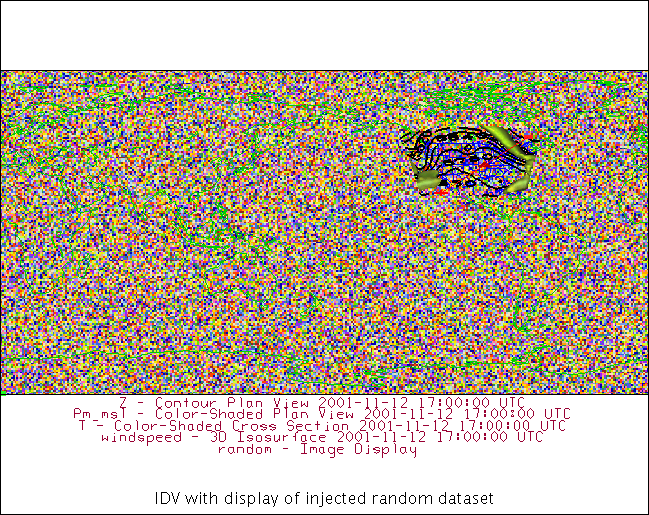

In [10]:
%make_image -caption 'IDV with display of injected random dataset'

--------------
# Example 2
## Compute  mass weighted vertical integral of water vapor and load the data into IDV

In [11]:
# open MERRA2 Reanalysis dataset
da=xr.open_dataset('https://geodesystems.com/repository/opendap/038361f9-fb9a-484c-9f1d-3623a12a47ca/entry.das') 

In [10]:
da

<xarray.Dataset>
Dimensions:  (lat: 361, lev: 42, lon: 576, time: 111043)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-01T03:00:00 ...
  * lev      (lev) float64 1e+03 975.0 950.0 925.0 900.0 875.0 850.0 825.0 ...
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 -87.5 -87.0 -86.5 ...
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 -177.5 -176.9 -176.2 ...
Data variables:
    epv      (time, lev, lat, lon) float32 ...
    h        (time, lev, lat, lon) float32 ...
    o3       (time, lev, lat, lon) float32 ...
    omega    (time, lev, lat, lon) float32 ...
    phis     (time, lat, lon) float32 ...
    ps       (time, lat, lon) float32 ...
    qi       (time, lev, lat, lon) float32 ...
    ql       (time, lev, lat, lon) float32 ...
    qv       (time, lev, lat, lon) float32 ...
    rh       (time, lev, lat, lon) float32 ...
    slp      (time, lat, lon) float32 ...
    t        (time, lev, lat, lon) float32 ...
    u        (time, lev, lat, lon) float

In [11]:
q=da.qv.isel(time=slice(0,2)) # just take a small slice of data

In [12]:
dpbyg=da.lev.copy() # make a copy of values
dpbyg.values=-1*np.gradient(da.lev*100.0)/9.8

In [16]:
CWV=(q*dpbyg).sum(dim='lev')  #should give Column Water Vapor in mm 
CWV.name='CWV'

In [17]:
CWV.to_IDV() #this data is in data sources, manually create a display

data loaded


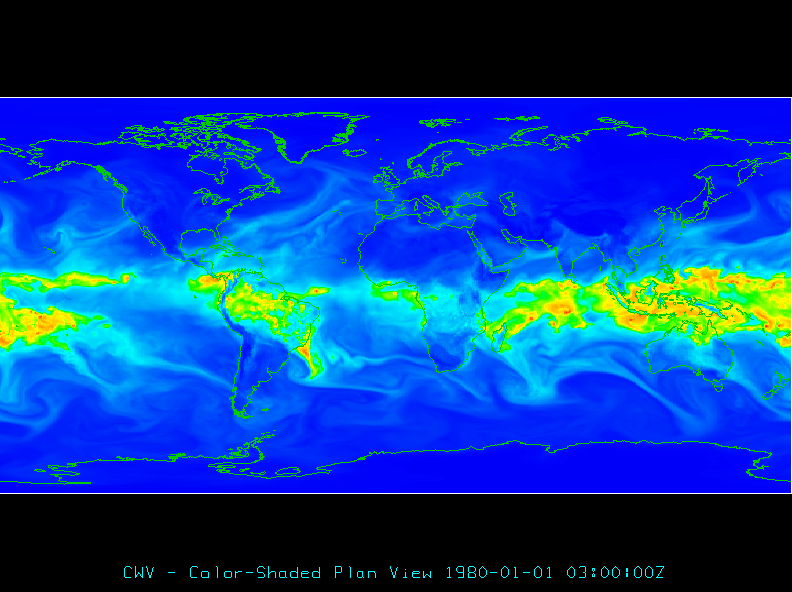

In [51]:
%make_image